# Метод анализа временных рядов «Гусеница» или SSA : Анализ сингулярного спектра

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import hankel,svd

Импортируем данные

In [2]:
xl = pd.ExcelFile('wine.xls')
data= xl.parse( sep='\t', index_col=-1)
F=data['rose'].values
F

array([112, 118, 129,  99, 116, 168, 118, 129, 205, 147, 150, 267, 126,
       129, 124,  97, 102, 127, 222, 214, 118, 141, 154, 226,  89,  77,
        82,  97, 127, 121, 117, 117, 106, 112, 134, 169,  75, 108, 115,
        85, 101, 108, 109, 124, 105,  95, 135, 164,  88,  85, 112,  87,
        91,  87,  87, 142,  95, 108, 139, 159,  61,  82, 124,  93, 108,
        75,  87, 103,  90, 108, 123, 129,  57,  65,  67,  71,  76,  67,
       110, 118,  99,  85, 107, 141,  58,  65,  70,  86,  93,  74,  87,
        73, 101, 100,  96, 157,  63, 115,  70,  66,  67,  83,  79,  77,
       102, 116, 100, 135,  71,  60,  89,  74,  73,  91,  86,  74,  87,
        87, 109, 137,  43,  69,  73,  77,  69,  76,  78,  70,  83,  65,
       110, 132,  54,  55,  66,  65,  60,  65,  96,  55,  71,  63,  74,
       106,  34,  47,  56,  53,  53,  55,  67,  52,  46,  51,  58,  91,
        33,  40,  46,  45,  41,  55,  57,  54,  46,  52,  48,  77,  30,
        35,  42,  48,  44,  45], dtype=int64)

Посмотрим размерность F

In [3]:
len(F)

174

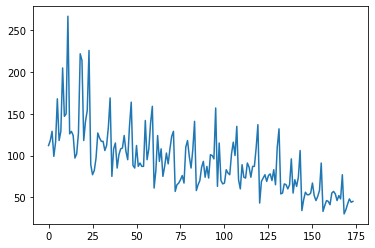

In [4]:
plt.plot(F)

# Шаг 1. Вложение

In [5]:
N=len(F) #длина ряда
L=40  #параметр - длина гусеницы
K=N-L+1
print(N,L,K)

174 40 135


In [6]:
X = hankel(c = F[0:L], r = F[L-1:])
X.shape #размерность матрицы

(40, 135)

In [7]:
X

array([[112, 118, 129, ...,  54,  55,  66],
       [118, 129,  99, ...,  55,  66,  65],
       [129,  99, 116, ...,  66,  65,  60],
       ...,
       [108, 115,  85, ...,  35,  42,  48],
       [115,  85, 101, ...,  42,  48,  44],
       [ 85, 101, 108, ...,  48,  44,  45]], dtype=int64)

# Шаг 2. Сингулярное разложение

In [8]:
u,s,v = svd(X)
v = v.T

In [9]:
u

array([[-0.17655773, -0.22074016,  0.23916041, ..., -0.04136841,
         0.00095577,  0.07546178],
       [-0.17622215, -0.27501265,  0.11802066, ...,  0.02493732,
        -0.02837424, -0.04276187],
       [-0.17566404, -0.23244568, -0.15694159, ..., -0.03098812,
         0.03019321, -0.00434332],
       ...,
       [-0.14077232, -0.17376868,  0.10060504, ...,  0.04365334,
         0.23291132,  0.21131322],
       [-0.14004703, -0.15104335, -0.09706048, ..., -0.16246217,
        -0.27219334,  0.05736028],
       [-0.13920725, -0.10379027, -0.18060871, ...,  0.16870738,
         0.07381467, -0.35339254]])

In [10]:
v

array([[-1.19915289e-01,  1.72743187e-01,  1.18433056e-01, ...,
        -7.37765687e-02, -4.67506465e-03,  1.12541600e-02],
       [-1.19843271e-01,  2.06638393e-01,  6.60044779e-02, ...,
         2.23986335e-02, -8.72795764e-02,  4.49012035e-02],
       [-1.19710411e-01,  1.90041187e-01, -1.65415802e-02, ...,
        -3.02409747e-02, -1.51373941e-02, -8.22347490e-02],
       ...,
       [-5.12052503e-02,  5.11544815e-02, -4.06513113e-04, ...,
         9.38467264e-01,  7.95533180e-03, -4.22408579e-03],
       [-5.10161545e-02,  4.50665095e-02,  9.22404871e-04, ...,
         1.24595205e-02,  9.38917023e-01,  2.21426969e-04],
       [-5.08124048e-02,  2.94613059e-02, -4.33322578e-03, ...,
        -2.06251176e-02,  3.35646442e-02,  9.19641106e-01]])

In [11]:
s


array([6971.41859229,  643.47463906,  609.34043584,  571.018776  ,
        566.49826605,  470.39022496,  464.91956947,  453.40075255,
        444.09603963,  436.15242748,  430.10296962,  320.65169242,
        297.42566251,  266.80426976,  263.24540514,  238.00723797,
        229.97222212,  214.02560692,  198.2736396 ,  189.45553735,
        174.80343419,  173.23471698,  166.99175336,  164.62082314,
        152.88643177,  151.65658587,  148.18909375,  142.13990876,
        140.42003854,  135.90633258,  133.33049934,  129.11465516,
        122.47980077,  117.47191042,  113.06605708,  110.16439049,
        108.83774044,  107.6821566 ,  100.65481753,   96.67378204])

In [12]:
d=list(s).index(s[s>0][-1])+1
d

40

Одномерные диаграммы дают представление о разложении ряда на составляющие. Первый вектор получается отвечает за тренд, после чего идет сглаживание, дальше проявляетс периодичность, которая потом переходит в шум.

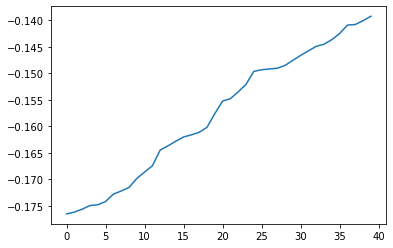

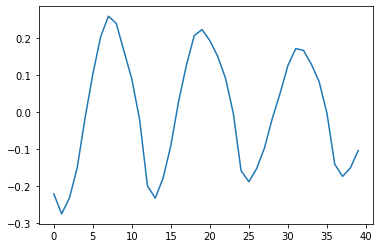

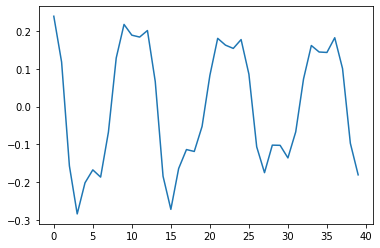

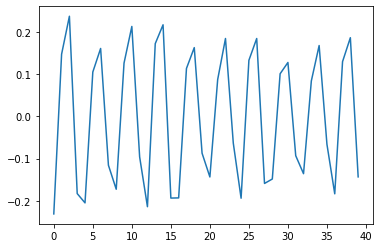

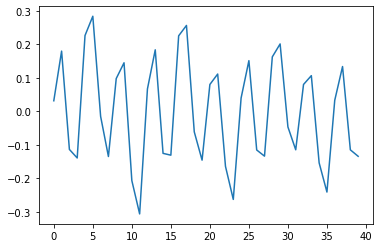

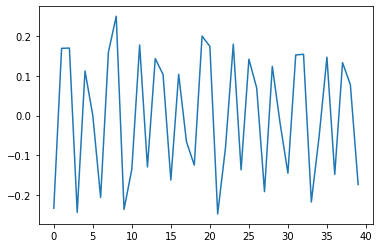

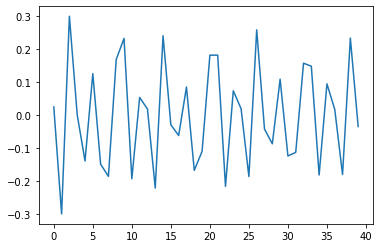

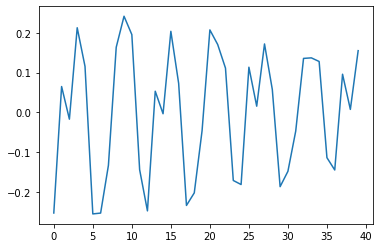

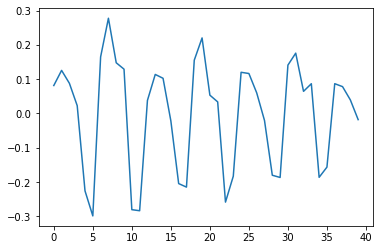

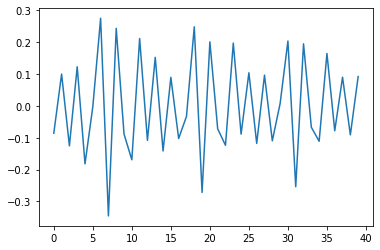

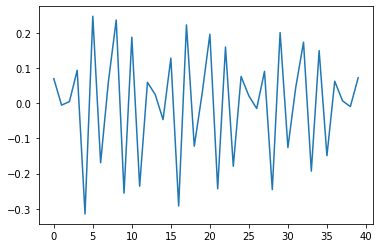

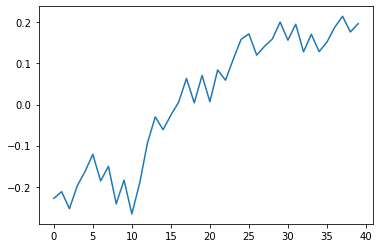

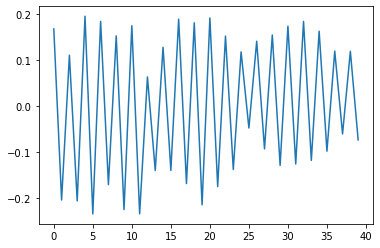

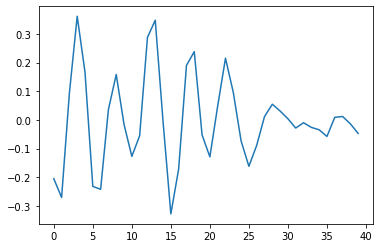

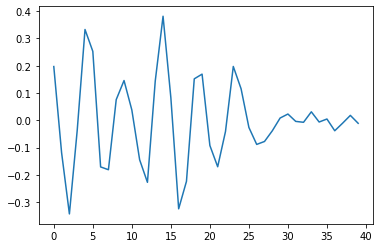

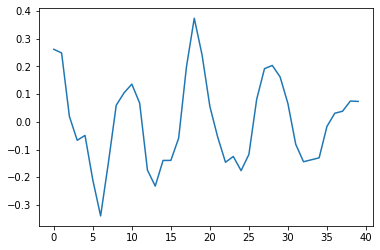

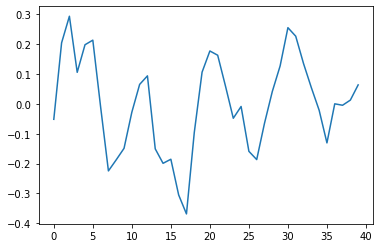

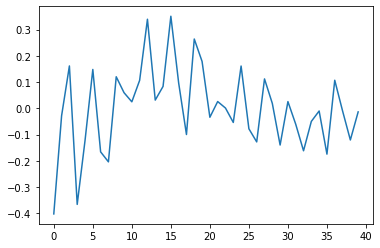

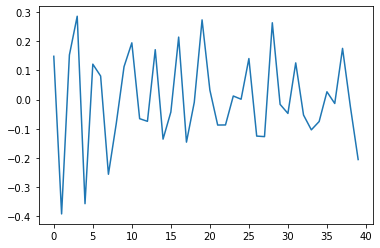

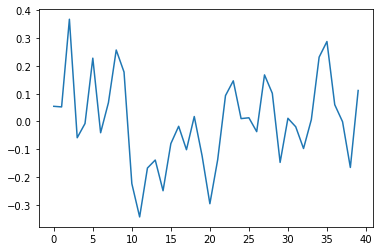

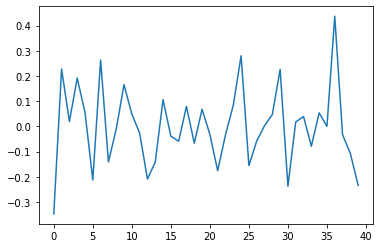

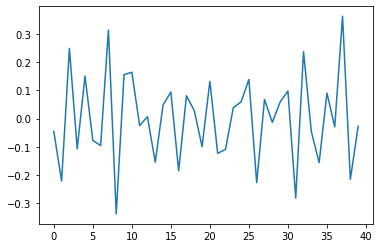

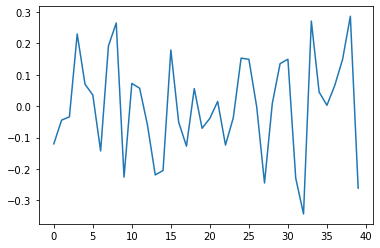

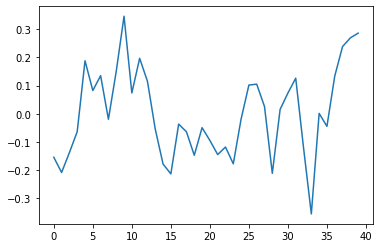

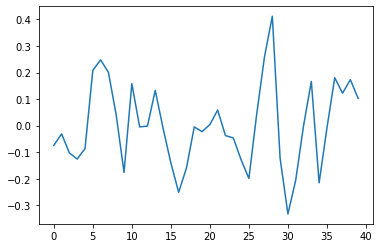

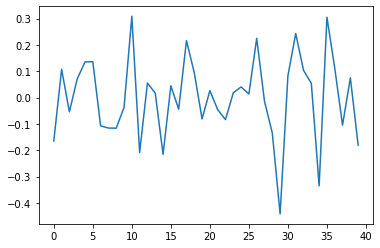

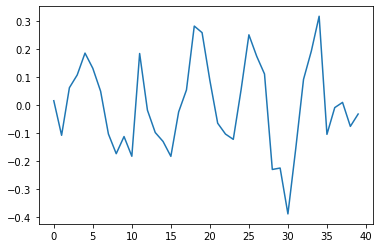

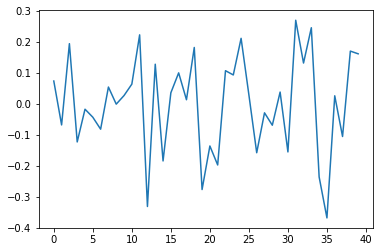

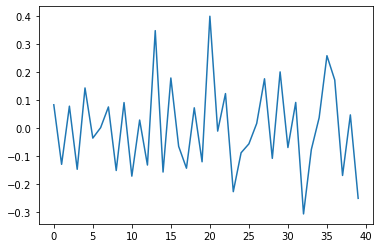

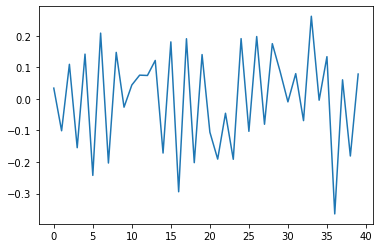

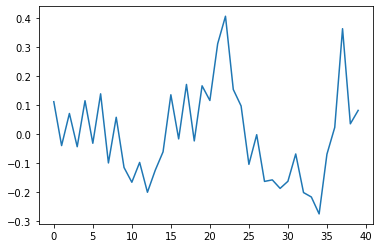

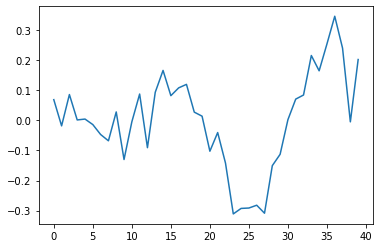

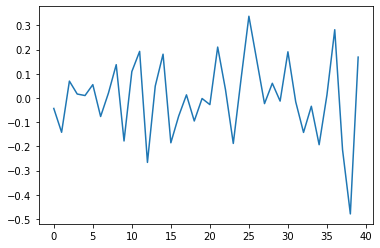

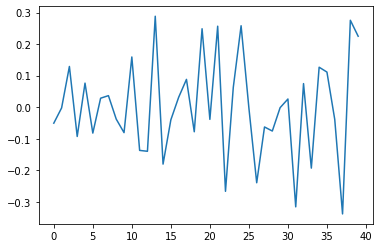

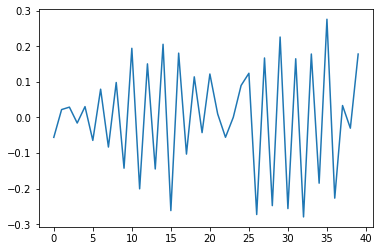

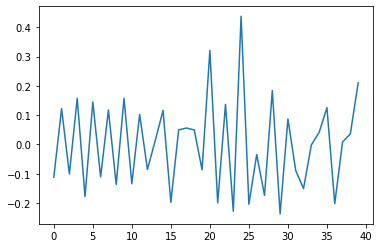

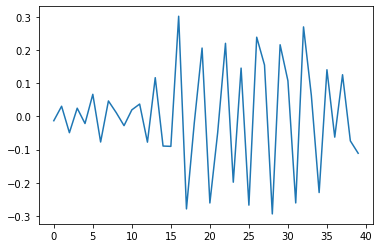

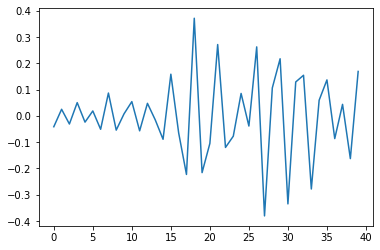

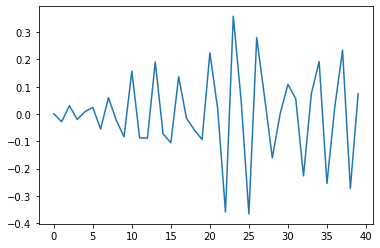

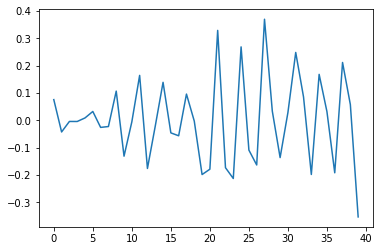

In [13]:
u_i = u.T
for i in range(len(u_i)):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(u_i[i])
    plt.show()

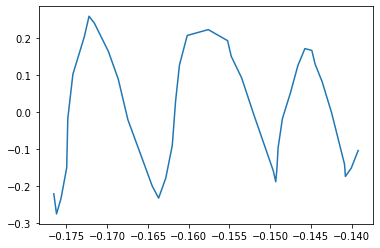

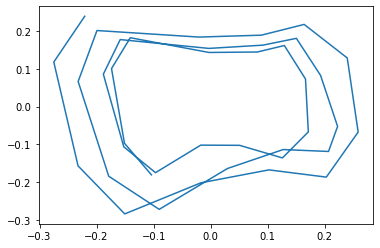

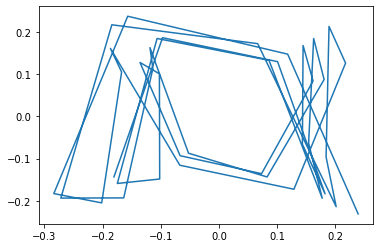

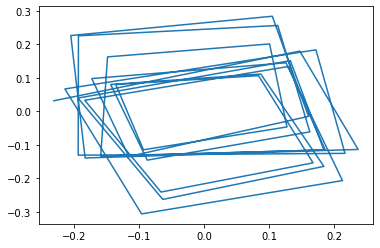

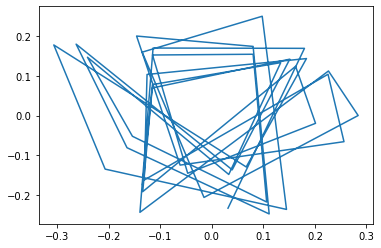

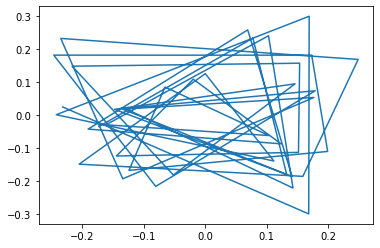

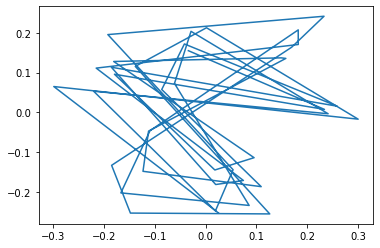

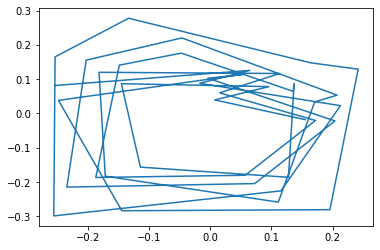

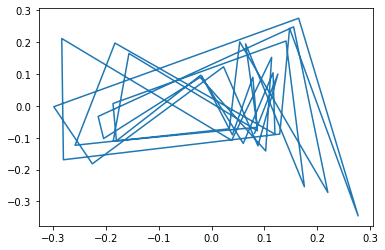

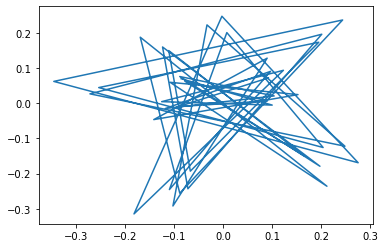

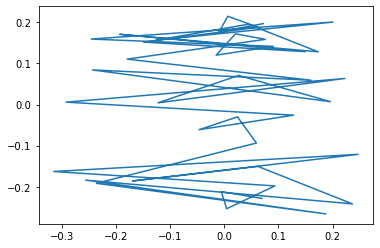

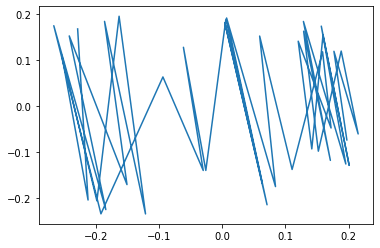

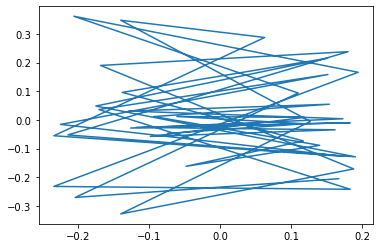

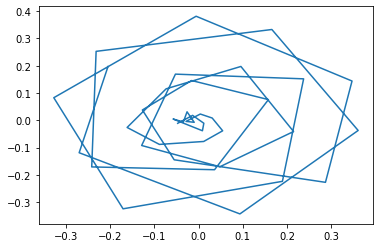

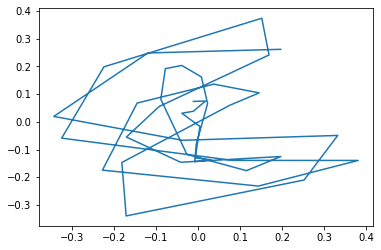

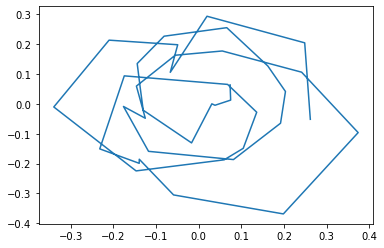

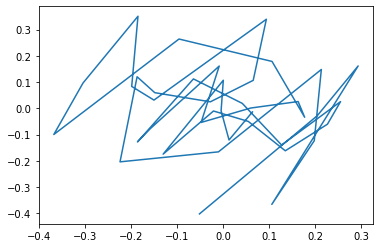

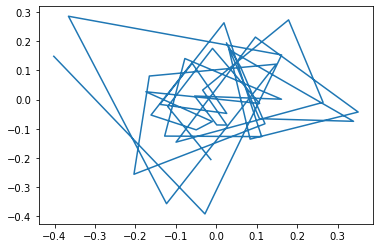

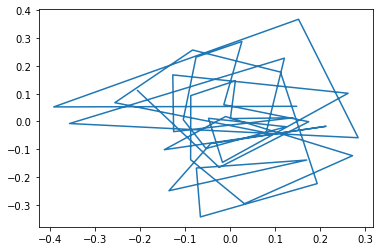

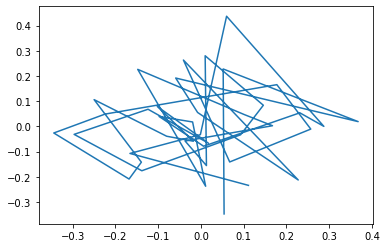

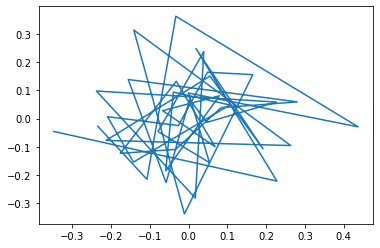

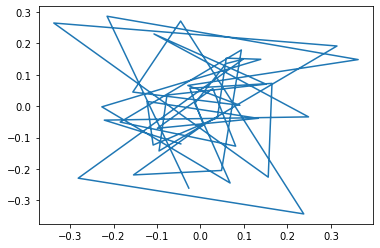

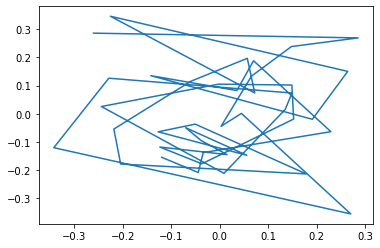

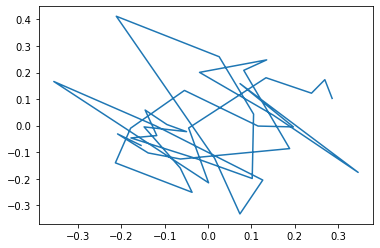

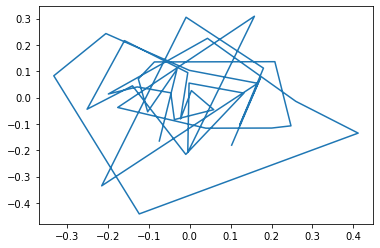

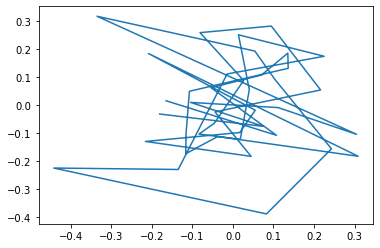

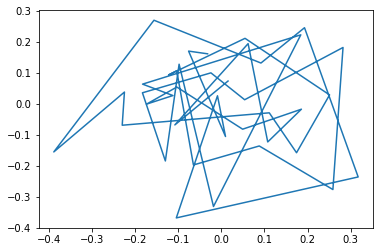

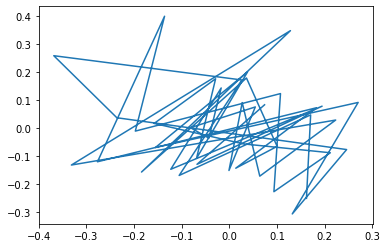

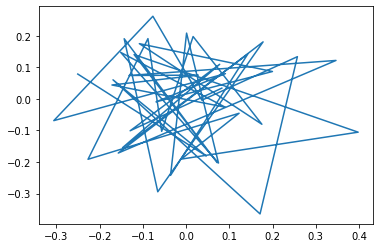

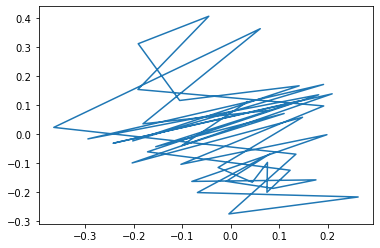

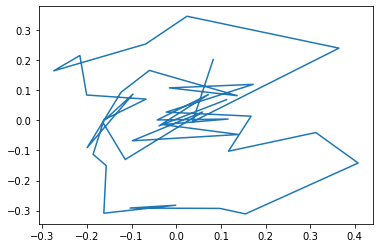

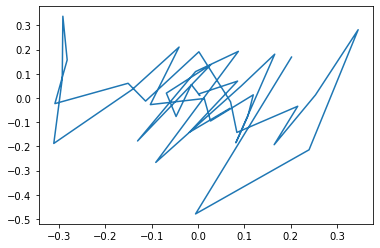

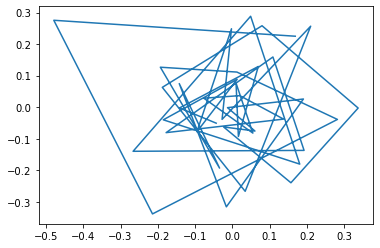

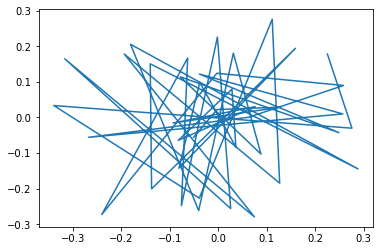

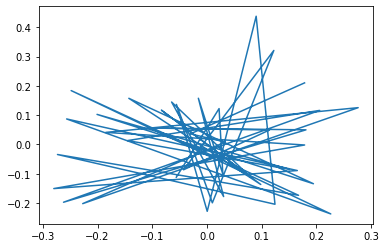

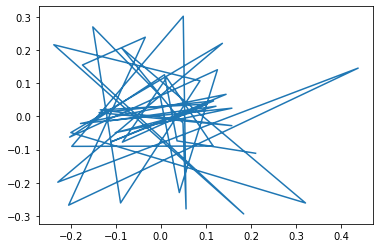

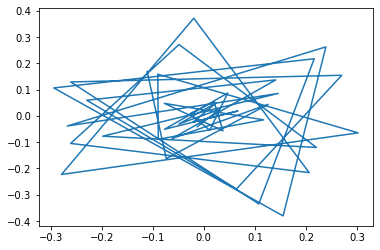

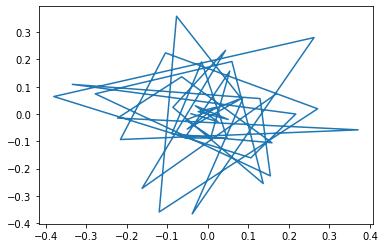

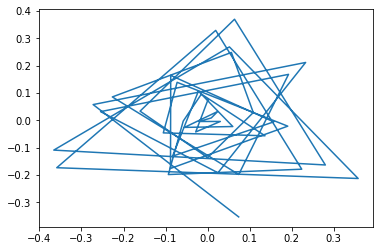

In [14]:
for i in range(len(u_i) - 1):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(u_i[i], u_i[i + 1])
    plt.show()

# Шаг 3. Групировка

In [15]:
X_i = np.array([s[i] * np.outer(u[:,i], v[:,i]) for i in range(0, d)])

In [16]:
X_i.shape

(40, 40, 135)

# Шаг 4. Диагональное усреднение

In [17]:
def find_g(y):
    L = min(y.shape)
    K = max(y.shape)
    N = L + K - 1
    if L < K:
        y1 = y
    elif L >= K:
        y1 = y.T
    g_1 = np.array([1 / (k + 1) * np.sum([y1[m, k-m] for m in range(k+1)]) for k in range(0, L-1)])
    g_2 = np.array([1 / (L-1) * np.sum([y1[m, k-m] for m in range(0, L-1)]) for k in range(L-1, K)])
    g_3 = np.array([1 / (N-k) * np.sum([y1[m, k-m] for m in range(k-K+1, N-K+1)]) for k in range(K, N)])
    return np.concatenate((g_1,g_2,g_3))


## Расмотрим разделение временного ряда на 3 составляющие:

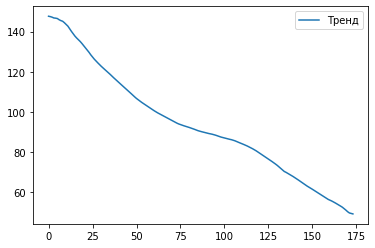

In [18]:
g1 = find_g(X_i[0])
plt.plot(g1, label = 'Тренд')
plt.legend()
plt.show()

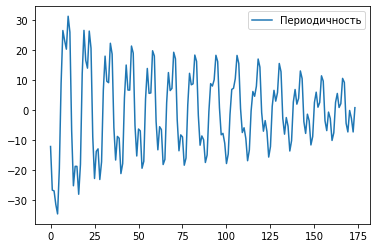

In [19]:
g2 = np.array([find_g(x) for x in X_i[1:4]])
plt.plot(g2.sum(axis = 0), label = 'Периодичность')
plt.legend()
plt.show()

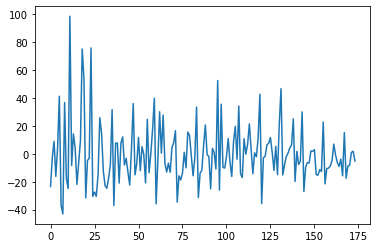

In [20]:
g3 = np.array([find_g(x) for x in X_i[4:]])
plt.plot(g3.sum(axis = 0), label = 'Шум')
plt.show()

In [21]:
g = np.array([find_g(x) for x in X_i])

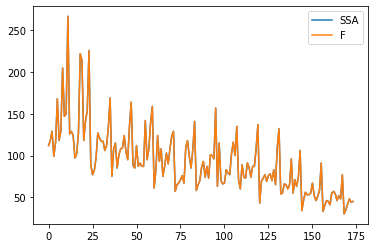

In [22]:
plt.plot(g.sum(axis = 0), label = 'SSA')
plt.plot(F, label = 'F')
plt.legend()
plt.show()